In [11]:
from configure_dataframes import directory_to_dataframe
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [41]:
IMG_SHAPE = (256, 256)

In [2]:
df = directory_to_dataframe("data")

In [42]:
df

,label,start_time,file_path,instrument,burst_type
0,burst,2023-01-26 02:49:00,data/2/2023-01-26 02-49-00_2023-01-26 02-50-00...,australia_assa_62,2
1,burst,2022-01-20 06:08:00,data/2/2022-01-20 06-08-00_2022-01-20 06-09-00...,australia_assa_62,2
2,burst,2022-01-20 06:25:00,data/2/2022-01-20 06-25-00_2022-01-20 06-26-00...,australia_assa_62,2
3,burst,2022-01-20 06:04:00,data/2/2022-01-20 06-04-00_2022-01-20 06-05-00...,australia_assa_62,2
4,burst,2021-09-17 04:19:00,data/2/2021-09-17 04-19-00_2021-09-17 04-20-00...,australia_assa_01,2
...,...,...,...,...,...
5535,no_burst,2021-05-11 06:02:00,data/no_burst/2021-05-11 06-02-00_2021-05-11 0...,australia_assa_01,no_burst
5536,no_burst,2022-10-24 21:06:00,data/no_burst/2022-10-24 21-06-00_2022-10-24 2...,australia_assa_62,no_burst
5537,no_burst,2023-01-31 22:10:00,data/no_burst/2023-01-31 22-10-00_2023-01-31 2...,australia_assa_62,no_burst
5538,no_burst,2022-03-29 02:02:00,data/no_burst/2022-03-29 02-02-00_2022-03-29 0...,australia_assa_62,no_burst


In [43]:
background_images = {}
images = []
for instrument in df.instrument.unique():
    df_instrument = df[df.instrument == instrument]
    total_img = len(df_instrument)
    empty_img = np.zeros((IMG_SHAPE))
    for idx, row in df_instrument.iterrows():
        img = Image.open(row.file_path).convert("L")
        img = np.array(img.resize(IMG_SHAPE))
        empty_img += img / total_img
    background_images[instrument] = empty_img

In [45]:
background_images["australia_assa_62"]

array([[65.45967078, 65.29794239, 65.31728395, ..., 65.09012346,
        65.02057613, 65.62345679],
       [71.55061728, 71.78765432, 71.50082305, ..., 71.20823045,
        71.03415638, 71.68888889],
       [92.91152263, 93.47160494, 93.07777778, ..., 92.57407407,
        92.34814815, 92.8345679 ],
       ...,
       [13.98641975, 14.00288066, 13.97654321, ..., 14.11028807,
        14.03333333, 14.21646091],
       [13.58395062, 13.64938272, 13.6399177 , ..., 13.68559671,
        13.59465021, 13.86707819],
       [13.03580247, 13.11440329, 13.18230453, ..., 13.1781893 ,
        13.04938272, 13.4436214 ]])

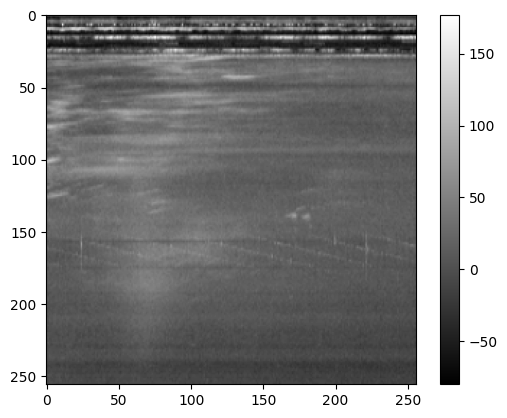

In [55]:
img_idx = 25
###
instrument = df.iloc[img_idx].instrument
img = Image.open(df.iloc[img_idx].file_path)
img = img.convert("L")
img = img.resize((256, 256))
img = np.array(img)
img_backsub = img - background_images[instrument]
plt.imshow(img_backsub, cmap="gray")
plt.colorbar()

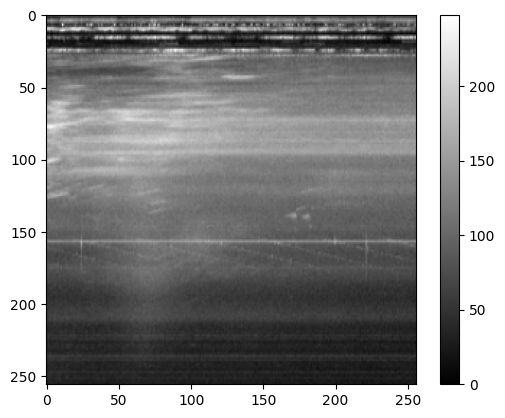

In [56]:
plt.imshow(img, cmap="gray")
plt.colorbar()